<a href="https://colab.research.google.com/github/lissaella/artificial-intelligence-project-/blob/main/MACHINE_LEARNING_ASSIGNMENT_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

'/content'

In [ ]:
# importing the libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


In [ ]:
from google.colab import files
uploaded = files.upload()
import io
#LOADING THE DATASET TO THE NOTEBOOK
df = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))
#getting the head part of the dataset
df.head()


Saving winequality-red.csv to winequality-red (5).csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#describing the data of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#GETTING THE INFO OF THE NOTEBOOK
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#getting the shape of the data in the dataset
df.shape

(1599, 12)

In [ ]:
#checking if the dataset has null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<Axes: ylabel='count'>

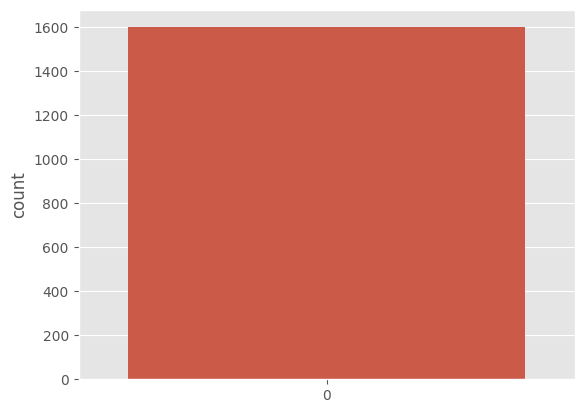

In [ ]:
style.use('ggplot')
sns.countplot(df['quality'])

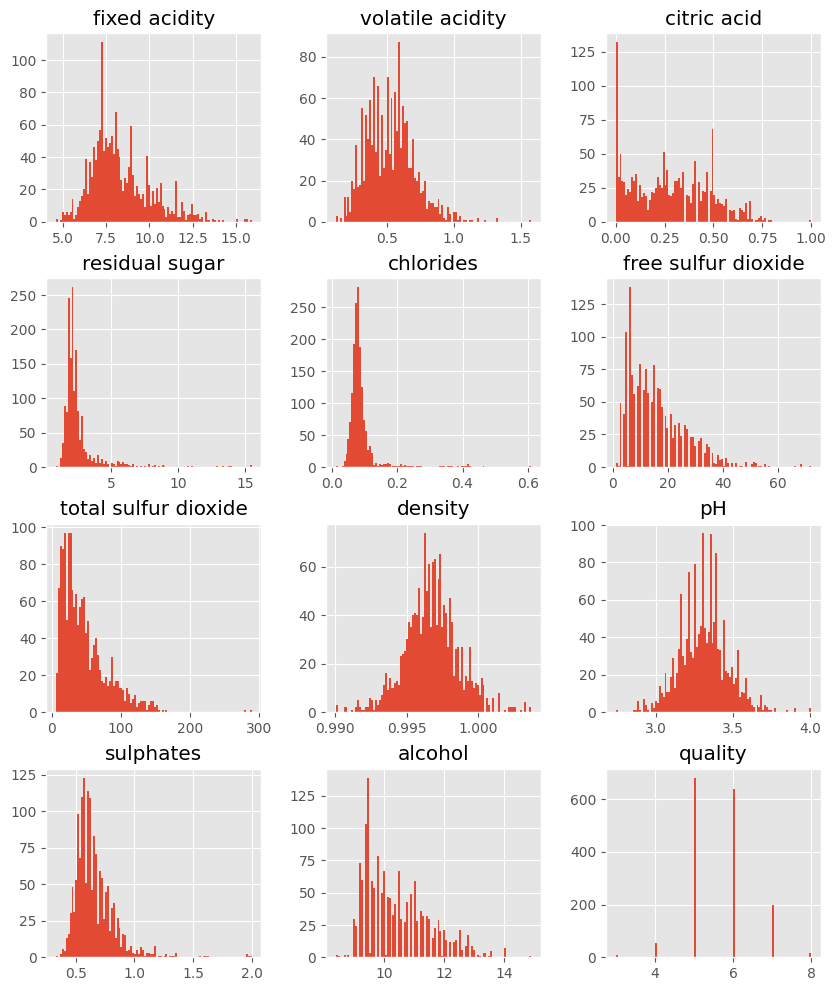

In [ ]:
#plotting a histogram for each of the data in the dataset
df.hist(bins = 100, figsize= (10,12))
plt.show()

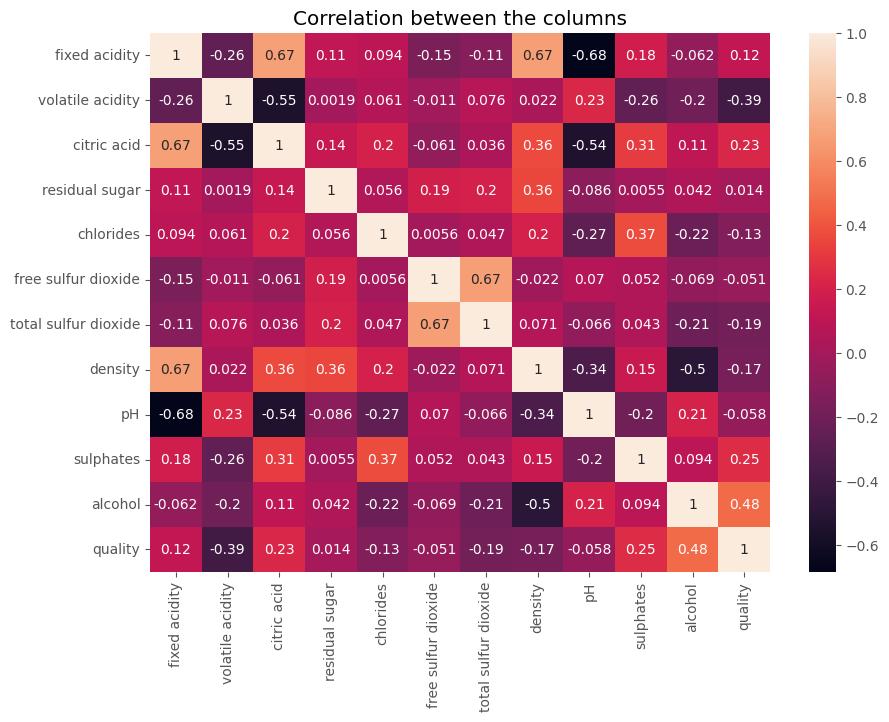

In [ ]:
#plotting a heatmap for the correlation between the columns of the dataset
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation between the columns')
plt.show()

In [ ]:
df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<Axes: >

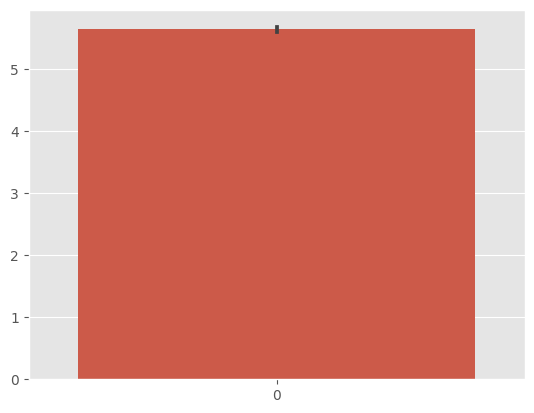

In [ ]:
sns.barplot(df['quality'])

In [ ]:
#CREATING THE TARGET VARIABLE
df['quality'] = df.quality.apply(lambda x:1 if x>=7 else 0)

In [ ]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [ ]:
#SPLITTING THE DATA INTO TRAINING AND TESTING 
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
#printing the shapes of the training and testing tests
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1119, 11)
y_train (1119,)
X_test (480, 11)
y_test (480,)


### LOGISTIC REGRESSION MODEL

In [ ]:
#using logisticRegression model to get the test accuracy and mean squared error to see the performance of the model
#Defining the LogisticRegression model
logreg = LogisticRegression()
#fitting the model to the training data
logreg.fit(X_train, y_train)
#making predictions on the testing data
logreg_pred = logreg.predict(X_test)
#evaluating the performance of te model using mean_squared_error
logreg_mse = mean_squared_error(logreg_pred, y_test)
#evaluating the performance of the model using accuracy
logreg_acc = accuracy_score(logreg_pred, y_test)
#printing the performances
print("test accuracy is: {:.2f}%".format(logreg_acc*100))
print("logistic Regression MSE: {:.2f}".format(logreg_mse))

test accuracy is: 86.67%
logistic Regression MSE: 0.13


In [ ]:
#printing the classification report 
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       413
           1       0.56      0.22      0.32        67

    accuracy                           0.87       480
   macro avg       0.72      0.60      0.62       480
weighted avg       0.84      0.87      0.84       480



TN:  401
FN:  52
TP:  15
FP:  12


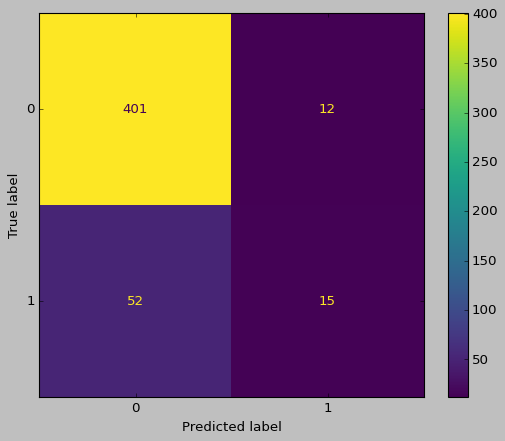

In [ ]:
#printing the confusion matrix of the logistic Regression model
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=logreg.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])


# DECISION TREE CLASSIFIER MODEL

In [ ]:
#using logisticRegression model to get the test accuracy and mean squared error to see the performance of the model
#defining the decision tree model or classifier model
dtree = DecisionTreeClassifier()
#fitting the model to the training data
dtree.fit(X_train, y_train)
#making predictions on the testing data
dtree_pred = dtree.predict(X_test)
#evaluating the performance of the model using mean_squared_error
dtree_mse = mean_squared_error(dtree_pred, y_test)
#evaluating the performance of the model using accuracy
dtree_acc = accuracy_score(dtree_pred, y_test)
#printing the performances of the model
print("Test accuracy: {:.2f}%".format(dtree_acc*100))
print("Decision Tree MSE: {:.2f}".format(dtree_mse))

Test accuracy: 86.04%
Decision Tree MSE: 0.14


In [ ]:
#printing the classification report of the decision tree classifier model
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       413
           1       0.50      0.64      0.56        67

    accuracy                           0.86       480
   macro avg       0.72      0.77      0.74       480
weighted avg       0.88      0.86      0.87       480



TN:  370
FN:  24
TP:  43
FP:  43


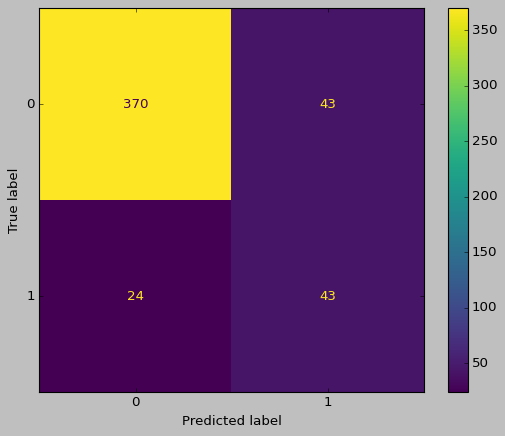

In [ ]:
#plotting the confusion matrix of the decision trees classifier model
style.use('classic')
cm = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=dtree.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

### RANDOM FOREST MODEL

In [ ]:
#using logisticRegression model to get the test accuracy and mean squared error to see the performance of the model
#defining the random forest classifier model
rforest = RandomForestClassifier()
#fitting the model to the training sets
rforest.fit(X_train, y_train)
#making predictions on the testing data
rforest_pred = rforest.predict(X_test)
#evaluating the performance of the model using mean_squared_error
rforest_mse = mean_squared_error(rforest_pred, y_test)
#evaluating the performance of the model using accuracy
rforest_acc = accuracy_score(rforest_pred, y_test)
#printinf the mean_squared_error and accuracy of the model
print("Random forest MSE: {:.2f}".format(rforest_mse))
print("Test accuracy: {:.2f}%".format(rforest_acc*100))

Random forest MSE: 0.11
Test accuracy: 88.54%


In [ ]:
#printing the classification report of the random forest classifier model
print(classification_report(y_test, rforest_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       413
           1       0.61      0.51      0.55        67

    accuracy                           0.89       480
   macro avg       0.76      0.73      0.74       480
weighted avg       0.88      0.89      0.88       480



TN:  391
FN:  33
TP:  34
FP:  22


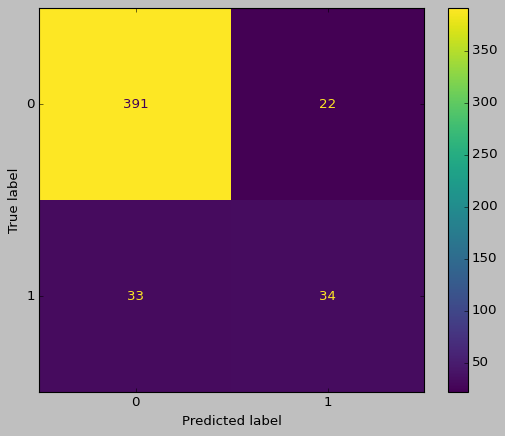

In [ ]:
#plotting the confusion matrix of the random forest classifier model
style.use('classic')
cm = confusion_matrix(y_test, rforest_pred, labels=rforest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=rforest.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

# TUNING PARAMETERS FOR RANDOM FOREST MODEL
### we are tuning hyper parameters for the random forest classification because according to the performance of the models it has the highest accuracy and the lowest mean squared error

In [ ]:
#DEFINING THE PARAMETER GRID
#Number of trees in random forest
n_estimators = [100, 200, 300]
#number of features to consider at every split
max_features = ['auto', 'sqrt']
#max number of levels in tree
max_depth = [2, 4]
#minimum number of samples required to split a node
min_samples_split = [2, 5]
#min-sample_leaf
min_samples_leaf = [1, 5]
#method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
#creating the random grid
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 5], 'bootstrap': [True, False]}


In [ ]:
#CREATING THE RANDOM FOREST MODEL
rforest_model = RandomForestClassifier()
#PERFORMING GRID SEARCH WITH CROSS VALIDATION
rforest_Grid = GridSearchCV(estimator = rforest_model, param_grid = param_grid, cv = 3, verbose=10, n_jobs = 4)


In [ ]:
rforest_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=10)

In [ ]:
#GETTING THE BEST PARAMETERS
rforest_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
#PRINTING THE TRAIN AND TEST ACCURACY OF THE BEST PARAMETERS
#CHECKING ACCURACY OF THE GRID SEARCH CV
print(f'Train Accuracy - : {rforest_Grid.score(X_train, y_train):.2f}')
print(f'Test Accuracy - :{rforest_Grid.score(X_test, y_test):.2f}')


Train Accuracy - : 0.92
Test Accuracy - :0.87


In [ ]:
#According to the results the train accuracy is higher than the test accuracy

# GROUP MEMBERS
# MUKISA IVAN     21/U/21240/EVE     2100721240
# KIFUKO KAREN  21/U/14336/PS       2100714336
# UKECH MELISSA MANUELA    21/U/10230/PS  2100710230
# AKAMPA JOHN KELVIN  21/U/08724/EVE    2100708724